# Data exploration and cleaning

The first task in a data science project is data acquisition and cleaning. After a visual exploration of features we will be able to discard invalid data, fix errors and transform variables to make easier the modelization process.

### Loading required libraries
Some of the required data wrangling is easier to do using additional libraries beyond $R$ base like `data.table` or `tidyverse` for working with data frames, `lubridate` dor times and dates, or `forcats` for categorical data. Let's go to load into the environment.

In [1]:
# Required libraries
listPackages <- c('data.table', 'tidyverse', 'lubridate', 'funModeling', 'forcats', 'corrplot')
newPackages <- listPackages[!(listPackages %in% installed.packages()[,'Package'])]
if(length(newPackages)) install.packages(newPackages)

rm(list = c('listPackages', 'newPackages'))

library(data.table)
library(tidyverse)
library(lubridate)
library(funModeling)
library(forcats)
library(corrplot)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.0.0     ✔ purrr   0.2.5
✔ tibble  1.4.2     ✔ dplyr   0.7.6
✔ tidyr   0.8.1     ✔ stringr 1.3.1
✔ readr   1.1.1     ✔ forcats 0.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()

Attaching package: ‘lubridate’

The following objects are masked from ‘package:data.table’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year

The following object is masked from ‘package:base’:

    date

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula

Attaching package: ‘Hmisc’

The followin

### Acquiring the data
We are going to take the datasets from my [Dropbox](www.dropbox.com) account. We will use two datasets:
* `autos.csv` : Main dataset of the project, which contains all the predictors and target.
* `zipcodes_de_completo.csv` : Table of german zipcodes with [Länder](https://en.wikipedia.org/wiki/States_of_Germany) correspondence. This table will help to reduce geographical complexity of the dataset.

In [2]:
# Download dataset from Dropbox
download.file(url = "https://www.dropbox.com/s/3802ph0qspdgtao/autos.csv?dl=1",
              destfile = '../data/autos.csv')
download.file(url = "https://www.dropbox.com/s/uzzhu05061xjm0z/zipcodes_de_completo.csv?dl=1",
              destfile = '../data/zipcodes_de_completo.csv')

### Loading autos.csv dataset

In [3]:
# Load dataset
filename <- '../data/autos.csv'
datasetCars <- fread(input = filename, 
                     stringsAsFactors = TRUE, 
                     quote = "",
                     colClasses = c(rep(x = 'factor', 4),
                                    'numeric',
                                    rep(x = 'factor', 2),
                                    'numeric',
                                    'factor',
                                    'numeric',
                                    'factor',
                                    rep('numeric', 2),
                                    rep('factor', 7)))


### Dataset inspection

The dataset contains more than 370k samples and 20 features.

In [4]:
dim(datasetCars)

[1] 371824     20

Let's go to inspect dataset structure. As we can see there are both numerical and categorical features.

In [5]:
str(datasetCars)

Classes ‘data.table’ and 'data.frame':	371824 obs. of  20 variables:
 $ dateCrawled        : Factor w/ 280652 levels "2016-03-05 14:06:22",..: 164643 164374 76603 106256 231281 271106 243057 141578 275651 103170 ...
 $ name               : Factor w/ 233704 levels "!!!!!!!!!!!!!!!!!!!!!!!!__GOLF_3_CABRIO___!!!!!!!!!!!!!!!!!!!!!!!",..: 79381 4241 90746 76767 170696 27488 145497 188560 64366 190608 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : num  480 18300 9800 1500 3600 650 2200 0 14500 999 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : num  1993 2011 2004 2001 2008 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            :

All features have been imported as desired, but some of them won't be necessary for analysis.
We will drop them later.

A first sight of the dataset show us some empty values.

In [6]:
head(datasetCars, 3)

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,"Jeep_Grand_Cherokee_""Overland""",privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


We can see some empty values at first sight!!
An ispection of the composition of the features can show us if there are NAs, zeroes or Inf values:

In [7]:
df_status(datasetCars)

              variable q_zeros p_zeros q_na p_na q_inf p_inf    type unique
1          dateCrawled       0    0.00    0    0     0     0  factor 280652
2                 name       0    0.00    0    0     0     0  factor 233704
3               seller       0    0.00    0    0     0     0  factor      2
4            offerType       0    0.00    0    0     0     0  factor      2
5                price   10785    2.90    0    0     0     0 numeric   5597
6               abtest       0    0.00    0    0     0     0  factor      2
7          vehicleType       0    0.00    0    0     0     0  factor      9
8   yearOfRegistration       0    0.00    0    0     0     0 numeric    155
9              gearbox       0    0.00    0    0     0     0  factor      3
10             powerPS   40860   10.99    0    0     0     0 numeric    794
11               model       0    0.00    0    0     0     0  factor    252
12           kilometer       0    0.00    0    0     0     0 numeric     13
13 monthOfRe

No NA values in the dataset, but a lot of zeroes. We should manage them.

In [8]:
summary(datasetCars)

              dateCrawled                      name               seller      
 2016-03-24 14:49:47:     7   Ford_Fiesta        :   657   gewerblich:     3  
 2016-03-19 21:49:56:     6   BMW_318i           :   627   privat    :371821  
 2016-03-26 22:57:31:     6   Opel_Corsa         :   624                      
 2016-03-05 14:25:23:     5   Volkswagen_Golf_1.4:   605                      
 2016-03-05 14:44:30:     5   BMW_316i           :   523                      
 2016-03-07 17:36:19:     5   BMW_320i           :   492                      
 (Other)            :371790   (Other)            :368296                      
   offerType          price               abtest           vehicleType   
 Angebot:371812   Min.   :0.000e+00   control:179091   limousine :95963  
 Gesuch :    12   1st Qu.:1.150e+03   test   :192733   kleinwagen:80098  
                  Median :2.950e+03                    kombi     :67626  
                  Mean   :1.729e+04                              :37899 

In some feaures, there are values with few samples (`seller`, `offerType`)
Numerical features, like `price`, `powerPS` or `yearOfRegistration` have strange values. We should clean them.

### Removing unused features

Some features are not interesting for the analysis because them are not providing useful information to the data. These measures are:
* `dateCrawled`: Info relative to the ad, not the car.
* `dateCreated`: Info relative to the ad, not the car.
* `nrOfPictures`: All values are 0.
* `lastSeen`: Info relative to the ad, not the car.
* `name`: Arbitrary description of the car.
* `abtest`: eBay internal data. Info relative to the ad, not the car.

In [9]:
deleteCols <- c('dateCrawled', 'dateCreated', 'nrOfPictures', 'lastSeen', 'name', 'abtest')
datasetCars[, (deleteCols) := NULL]

### Missing values exploration

In [10]:
any(!complete.cases(datasetCars))
map_dbl(.x = datasetCars, .f = function(x){sum(is.na(x))})

[1] FALSE

seller           offerType               price         vehicleType 
                  0                   0                   0                   0 
 yearOfRegistration             gearbox             powerPS               model 
                  0                   0                   0                   0 
          kilometer monthOfRegistration            fuelType               brand 
                  0                   0                   0                   0 
  notRepairedDamage          postalCode 
                  0                   0

It seems there is not NA vaues in the dataset, let's try to detect empty values

In [11]:
map_lgl(.x = datasetCars, .f = function(x){any(is.na(x) | x == '')})

seller           offerType               price         vehicleType 
              FALSE               FALSE               FALSE                TRUE 
 yearOfRegistration             gearbox             powerPS               model 
              FALSE                TRUE               FALSE                TRUE 
          kilometer monthOfRegistration            fuelType               brand 
              FALSE               FALSE                TRUE               FALSE 
  notRepairedDamage          postalCode 
               TRUE               FALSE

There are some variables with empty values, so it is necessary to detect and evaluate if we will remove them or assign another value. Whe have to converto to character prior to asign NA. We create a function to do so.

In [12]:
assignNA <- function(column){
  column <- as.character(column)
  column[column == ''] <- NA
  column <- as.factor(column)
}

In [13]:
datasetCars$vehicleType <- assignNA(datasetCars$vehicleType)
datasetCars$gearbox <- assignNA(datasetCars$gearbox)
datasetCars$model <- assignNA(datasetCars$model)
datasetCars$fuelType <- assignNA(datasetCars$fuelType)
datasetCars$notRepairedDamage <- assignNA(datasetCars$notRepairedDamage)

In [14]:
map_dbl(.x = datasetCars, .f = function(x){sum(is.na(x))})

seller           offerType               price         vehicleType 
                  0                   0                   0               37899 
 yearOfRegistration             gearbox             powerPS               model 
                  0               20223                   0               20498 
          kilometer monthOfRegistration            fuelType               brand 
                  0                   0               33415                   0 
  notRepairedDamage          postalCode 
              72124                   0

**Aha!** a lot of NA have appeared!! Let's remove them later

### Distribution of categorical variables

It is important to know about the distribution of the values of the categorical variables to detect problems in the dataset.

In [15]:
categoricalCols <- c('seller', 'offerType', 'vehicleType', 'gearbox', 'fuelType', 'notRepairedDamage')
datasetCarsCategorical <- datasetCars[, ..categoricalCols ]

We will change the shape of the dataset to long format for better visualization.

In [16]:
datasetCarsCategorical <- datasetCarsCategorical %>% gather()

Warning message:
“attributes are not identical across measure variables;
they will be dropped”

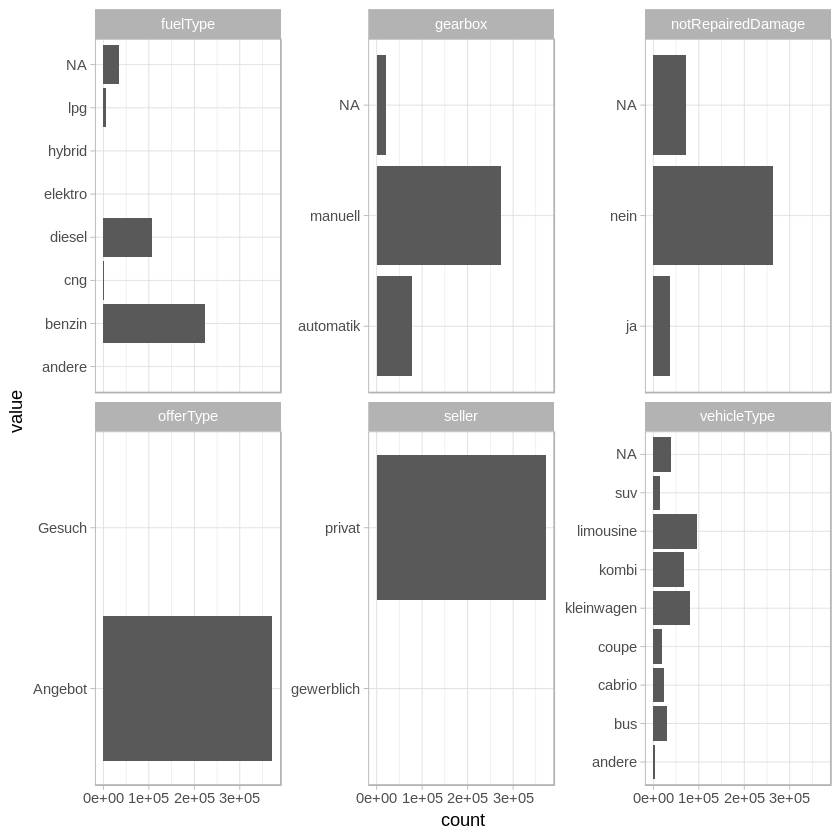

In [17]:
ggplot(datasetCarsCategorical, aes(value)) +
  geom_bar() +
  coord_flip() +
  facet_wrap(~ key, scales = 'free_y') +
  theme_light()

We are going to remove all NA values unles from notRepairedDamage variable (NA will be converted to 'Nein')

#### Brands chart

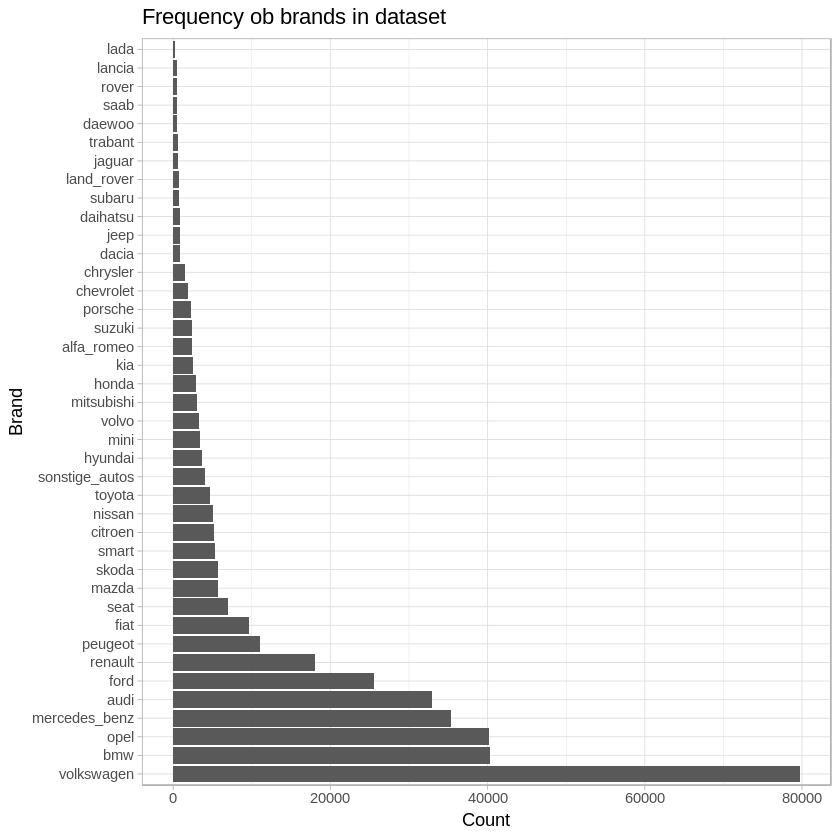

In [18]:
ggplot(datasetCars, aes(x = fct_infreq(brand))) +
  geom_bar() +
  coord_flip() + 
  theme_light() +
  xlab('Brand') +
  ylab('Count') +
  labs(title = 'Frequency ob brands in dataset')

It seems german people likes german cars :-)

### Histograms of numeric variables

The same we did with categorical features has to be done with numerical.

In [19]:
numericalCols <- c('price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration')
datasetCarsNumerical <- datasetCars[, ..numericalCols]

Again, long format for better visualization

In [20]:
datasetCarsNumerical <- datasetCarsNumerical %>% gather()

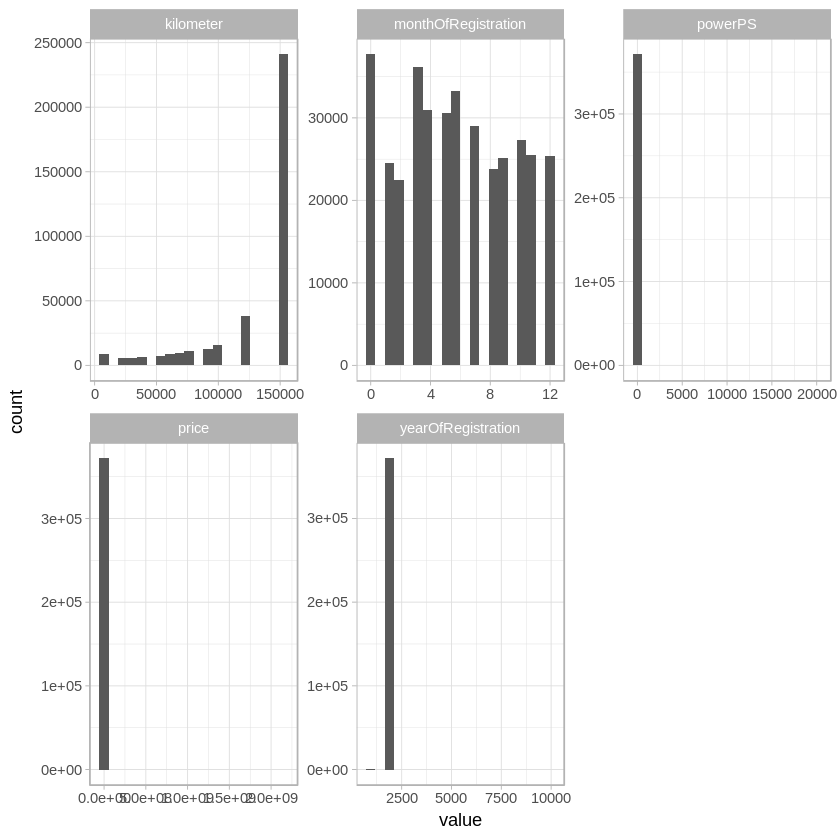

In [21]:
ggplot(datasetCarsNumerical, aes(x=value)) +
  geom_histogram(bins = 20) +
  facet_wrap(~key, scales = 'free') +
  theme_light()

#### Some comments:
* It seems `kilometer` could be transformed to categorical
* `monthOfRegistration` = 0?? Quite strange
* `powerPS`, `price` and `yearOfRegistration` have some outliers!!

Some environment cleaning before moving on. Let's remove some unused objects and variables.

In [22]:
rm(list = c('categoricalCols', 'datasetCarsCategorical', 'datasetCarsNumerical', 'numericalCols', 'deleteCols', 'filename'))

### Cleaning the dataset. Removing NA and invalid cases

#### Price

In [23]:
paste('Maximum price in dataset:', max(datasetCars$price), '€')

[1] "Maximum price in dataset: 2147483647 €"

It seems the original DeLorean DMC-12 is on sale :-)

In [24]:
paste('Minimum price in dataset:', min(datasetCars$price), '€')

[1] "Minimum price in dataset: 0 €"

Free cars?? I don't think so.

Some prices will be dropped from dataset. We will keep samples with price between 200€ and 100000€

In [25]:
datasetCars <- datasetCars[price > 200 & price <= 100000]

#### Year of registration

Let's do same exercise with `yearOfRegistration`

In [26]:
paste('Maximum year in dataset:', max(datasetCars$yearOfRegistration))

[1] "Maximum year in dataset: 9999"

In [27]:
paste('Minimum year in dataset:', min(datasetCars$yearOfRegistration))

[1] "Minimum year in dataset: 1000"

Some years will be dropped from dataset as well. We will keep cars from between 1950 and 2016

In [28]:
datasetCars <- datasetCars[yearOfRegistration > 1950 & yearOfRegistration < 2017]

#### Kilometer

With `kilometer` too.

In [29]:
paste('Maximum kilometer in dataset:', max(datasetCars$kilometer), 'Kms')

[1] "Maximum kilometer in dataset: 150000 Kms"

In [30]:
paste('Minimum kilometer in dataset:', min(datasetCars$kilometer), 'Kms')

[1] "Minimum kilometer in dataset: 5000 Kms"

Nothing strange here, but kilometer seems to be categorical, could refactor just in case we need it in modeling phase.

In [31]:
datasetCars[, kilometerCategorical := cut(x = kilometer,
                                          breaks = c(0, 50000, 100000, 150000),
                                          labels = c('km<50000', '50000>km<100000', 'km>100000'))]

#### Power PS

And `powerPS`

In [32]:
paste('Maximum Power PS in dataset:', max(datasetCars$powerPS), 'PS')

[1] "Maximum Power PS in dataset: 20000 PS"

In [33]:
paste('Minimum Power PS in dataset:', min(datasetCars$powerPS), 'PS')

[1] "Minimum Power PS in dataset: 0 PS"

Some powerPS values will be dropped from dataset. We will keep values > 0 and <= 400

In [34]:
datasetCars <- datasetCars[powerPS > 0 & powerPS <= 400]

#### Not repaired damage

We have to recode this feature. NA values will be converted to 'nein'

In [35]:
datasetCars[is.na(notRepairedDamage), notRepairedDamage := 'nein']

#### Offer type
We are not interested in auctions, only in direct sales

In [36]:
datasetCars <- datasetCars[offerType != 'Gesuch']

#### Seller
We only want privat sellers

In [37]:
datasetCars <- datasetCars[seller == 'privat']

#### Model
Removing model 'andere' = 'other'. No added info provided by this feature.

In [38]:
datasetCars <- datasetCars[model != 'andere']

#### Fuel type
Removing Fuel type 'andere' = 'other'

In [39]:
datasetCars <- datasetCars[fuelType != 'andere']

####  Vehicle type
Removing Vehicle type 'andere' = 'other'

In [40]:
datasetCars <- datasetCars[vehicleType != 'andere']

### Final dataset

#### Brand and Model
Removing samples with empty values and unused features

In [41]:
datasetCarsFinal <- datasetCars[!is.na(vehicleType) &
                                    !is.na(gearbox) &
                                    !is.na(fuelType) &
                                    !is.na(brand) &
                                    !is.na(model) &
                                    !is.na(notRepairedDamage),
                                  c('price', 'vehicleType', 'yearOfRegistration',
                                    'gearbox', 'powerPS','kilometerCategorical', 
                                    'fuelType', 'brand', 'model', 'notRepairedDamage',
                                    'postalCode', 'kilometer')]

We decide to concatenate `brand` and `model` features because it will be better for modeling. Doesn't make sense these kind of combinations: {'brand': 'Mercedes-Benz', 'model': 'A4'} or {'brand': 'Seat', 'model': 'Mégane'}, so it's better to train the model with real combinations of `brand` and `model`.

In [42]:
datasetCarsFinal[, brandModel := paste(brand, model, sep = ' ')]

#### Vehicle type cleaning
'bus' is a vehicle type that could be wrong for some models. To correct it we create a helper table with typical vehicle type per Brand and model. For all 'bus' samples we check if bus is the typical vehicle type for the model. If not, we change the type.

In [43]:
modelTypeTypical <- datasetCarsFinal[, .(N = .N), by = .(brandModel, vehicleType)] %>% 
  .[order(brandModel, -N)] %>% 
  .[, .SD[1], by = brandModel] %>% 
  .[, c('brandModel', 'vehicleType')]

colnames(modelTypeTypical) <- c('brandModel', 'vehicleTypeTypical')

datasetCarsFinal <- modelTypeTypical[datasetCarsFinal, on = 'brandModel']

datasetCarsFinal <- datasetCarsFinal[, vehicleType := case_when(vehicleType == 'bus' ~ vehicleTypeTypical,
                                                                TRUE ~ vehicleType)]
datasetCarsFinal$vehicleTypeTypical <- NULL

#### Postal code
Using table of correspondences postalCode -> Land we will reduce the geographical complexity of the model.

In [44]:
zipcodes <- fread(input = '../data/zipcodes_de_completo.csv',
                  select = c('zipcode', 'state', 'community'),
                  colClasses = c(rep('character', 11)))
zipcodes <- zipcodes[!duplicated(zipcodes)]
colnames(zipcodes)[1] <- 'postalCode'
datasetCarsFinal <- zipcodes[datasetCarsFinal, on = 'postalCode']
datasetCarsFinal <- datasetCarsFinal[!is.na(datasetCarsFinal$state),]

Now, every postal code has an associated länder.

In [45]:
head(datasetCarsFinal)

postalCode,state,community,brandModel,price,vehicleType,yearOfRegistration,gearbox,powerPS,kilometerCategorical,fuelType,brand,model,notRepairedDamage,kilometer
90480,Bayern,Nürnberg,jeep grand,9800,suv,2004,automatik,163,km>100000,diesel,jeep,grand,nein,125000
91074,Bayern,Landkreis Erlangen-Höchstadt,volkswagen golf,1500,kleinwagen,2001,manuell,75,km>100000,benzin,volkswagen,golf,nein,150000
60437,Hessen,"Frankfurt am Main, Stadt",skoda fabia,3600,kleinwagen,2008,manuell,69,50000>km<100000,diesel,skoda,fabia,nein,90000
33775,Nordrhein-Westfalen,Gütersloh,bmw 3er,650,limousine,1995,manuell,102,km>100000,benzin,bmw,3er,ja,150000
67112,Rheinland-Pfalz,Rhein-Pfalz-Kreis,peugeot 2_reihe,2200,cabrio,2004,manuell,109,km>100000,benzin,peugeot,2_reihe,nein,150000
94505,Bayern,Landkreis Deggendorf,ford c_max,14500,bus,2014,manuell,125,km<50000,benzin,ford,c_max,nein,30000


### Last look to numerical features

Previous saving data, let's have a look of the distributions of numerical variables after the cleaning process.

In [46]:
numericalCols <- c('price', 'yearOfRegistration', 'powerPS')
datasetCarsNumerical <- datasetCarsFinal[, ..numericalCols]
datasetCarsNumerical <- datasetCarsNumerical %>% gather()

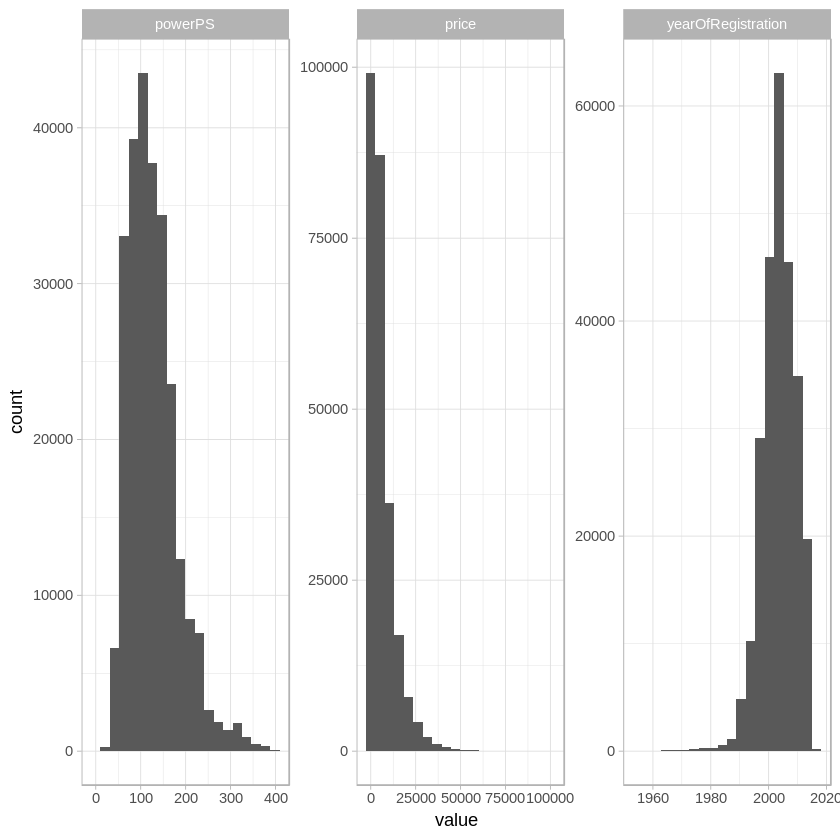

In [47]:
ggplot(datasetCarsNumerical, aes(x=value)) +
  geom_histogram(bins = 20) +
  facet_wrap(~key, scales = 'free') +
  theme_light()

Disttributions look now much better.

### Last look to categorical features
Convert character variables to factor class.

In [48]:
charToFactor <- c('postalCode', 'state', 'brand', 'model', 'brandModel')
datasetCarsFinal[, (charToFactor) := lapply(.SD, as.factor), .SDcols = charToFactor]

### Columns in correct order

In [49]:
datasetCarsFinal <- datasetCarsFinal[, c('postalCode', 'state', 'brand', 'model','brandModel', 'vehicleType', 
                                         'gearbox', 'fuelType', 'notRepairedDamage', 'kilometerCategorical',
                                         'kilometer','powerPS', 'yearOfRegistration', 'price')]

### Saving data
R Objects and csv file for modeling with Python.

In [50]:
save(datasetCars, file = '../data/datasetCars')
save(datasetCarsFinal, file = '../data/datasetCarsFinal')

fwrite(datasetCarsFinal, file = '../data/autosFinal.csv', row.names = F)

Cleaning of environment

In [51]:
rm(list = ls())

## This part is finished. Let's go visualize some data!